In [72]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randrange, getrandbits
import random

# RSA Functions

In [73]:
def encrypt(m,e,n):
    x = pow(m,e,n)
    return x

def decrpty(m,d,n):
    x = pow(m,d,n)
    return x

def power(x, y, p):

    res = 1


    x = x % p
    while (y > 0):


        if (y & 1):
            res = (res * x) % p


        y = y>>1; # y = y/2
        x = (x * x) % p

    return res


def miillerTest(d, n):


    a = 2 + random.randint(1, n - 4)

    x = power(a, d, n)

    if (x == 1 or x == n - 1):
        return True

    while (d != n - 1):
        x = (x * x) % n
        d *= 2

        if (x == 1):
            return False
        if (x == n - 1):
            return True

    # Return composite
    return False

def isPrime( n, k=4):
    # Corner cases
    if (n <= 1 or n == 4):
        return False
    if (n <= 3):
        return True


    d = n - 1
    while (d % 2 == 0):
        d //= 2

    for i in range(k):
        if (miillerTest(d, n) == False):
            return False

    return True




def gcd(a, b):
    if (a == 0):
        return b

    return gcd(b % a, a)

def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        return 0
    else:
        return x % m

def is_prime(n, k=128):


    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    # find r and s
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    # do k tests
    for _ in range(k):
        a = randrange(2, n - 1)
        x = pow(a, r, n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = pow(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True

def generate_prime_candidate(length):

    # generate random bits
    p = getrandbits(length)
    p |= (1 << length - 1) | 1
    return p
def generate_prime_number(length):

    p = 4
    while not is_prime(p,128):
        p = generate_prime_candidate(length)
    return p

# Padding vectors

In [74]:
def pad1D(A,B):
    A,B = np.concatenate([A,np.zeros_like(B)]) , np.concatenate([B,np.zeros_like(A)])
    if math.ceil(math.log(A.shape[0],2))!= math.floor(math.log(A.shape[0],2)):
        A = np.pad(A,(0,2**(math.ceil(math.log(len(A),2))) - len(A)), mode = 'constant')
        B = np.pad(B,(0,2**(math.ceil(math.log(len(B),2))) - len(B)), mode = 'constant')
    return A,B

In [75]:
def pad2d(A):
    math.ceil(math.log(A.shape[1],2))!= math.floor(math.log(A.shape[1],2))
    a,b = 2**(math.ceil(math.log(A.shape[0],2))) - A.shape[0] ,2**(math.ceil(math.log(A.shape[1],2))) - A.shape[1]
    B = np.pad(A,((0,a),(0,b)), mode = 'constant')
    return B

# DFT And FFT

In [76]:
def dft(x, inverse) :
    x = np.asarray(x,dtype = 'complex_')
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n * inverse  / N)
    x[0] = np.dot(x[0],M[0][0])
    return np.dot(M,x)

In [77]:
def FFT(x,inverse):
    x = np.asarray(x, dtype='complex_')
    N = x.shape[0]
    if N ==1 :
        return (x)
    
    X_even = FFT(x[::2], inverse)
    X_odd = FFT(x[1::2], inverse)
    factor = np.exp(-2j * np.pi  * np.arange(N) * inverse  / N,dtype = 'complex_')

    return np.concatenate([X_even + factor[:N // 2] * X_odd, 
                            X_even + factor[N // 2:] * X_odd])

In [78]:
def fft2d(A1):

    return FFT(A1,1)

def ifft2d(A1):

    return FFT(A1,-1)

# Polynomial multiplication and RSA enc/dec

In [79]:
def pointwisemul(A,B):
    return np.multiply(A,B)

In [80]:
A = np.random.random(1024)
B = np.random.random(1024)

AP, BP = pad1D(A, B)

A_dft = dft(AP,1)
B_dft = dft(BP,1)

A_fft = FFT(AP,1)
B_fft = FFT(BP,1)

C_x = pointwisemul(A_fft,B_fft)
C_x = (1/C_x.shape[0]) * (FFT(C_x, -1))

'''
RSA 
'''

bits = int(input("enter no of bits : "))

p1 = generate_prime_number(bits)
while(not isPrime(p1)):
    p1 = generate_prime_number(bits)

q1 = generate_prime_number(bits)
while(not isPrime(q1)):
    q1 = generate_prime_number(bits)




num1 = p1*q1
phi1 = (p1-1)*(q1-1)


e1 = 3
d1 = 0

while(gcd(e1,phi1)!=1 or d1 == 0):
    e1 = e1+2
    d1 = modinv(e1,phi1)
    if(d1 == 0):
        e1 = e1+2

import math
def complexe_modulo(z):
    a = z.real
    b = z.imag
    return math.sqrt(a**2+b**2)

test = C_x

lst = []
for i in test:
    x = complexe_modulo(i)
    lst.append(int(x))

print("encrypting ......")
enc = []
for i in lst:
    en = encrypt(i,e1,num1)
    enc.append(en)

print("decrypting ......")
dec = []
for e in enc:
    x = decrpty(e,d1,num1)
    dec.append(x)


flag = 1
for i in range(0,len(lst)):
    if(lst[i] != dec[i]):
        flag = 0
        break

if flag:
    print("the lists match")

else:
    print("the lists dont match")

'''
***************************
'''

print(np.allclose(FFT(AP,1), np.fft.fft(AP)))

print(np.allclose(C_x, np.fft.ifft(np.fft.fft(AP) * np.fft.fft(BP))))

encrypting ......
decrypting ......
the lists match
True
True


In [81]:
x = np.random.random(1024)
%timeit dft(x,1)
%timeit FFT(x,1)
%timeit np.fft.fft(x)
%timeit FFT(x,-1)
%timeit np.fft.ifft(x)

74.2 ms ± 865 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.6 ms ± 61.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.5 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.6 ms ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.7 µs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 2d FFT/IFFT on random matrix

In [82]:
np.polymul(A,B).shape
C_x.shape

(2048,)

In [83]:
A = np.reshape(np.random.random(8* 7),(8, 7))
S = A.shape
A = pad2d(A)
A.shape


(8, 8)

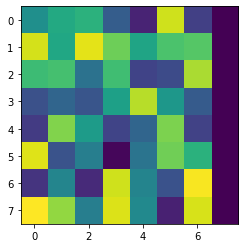

In [84]:
plt.imshow(A)

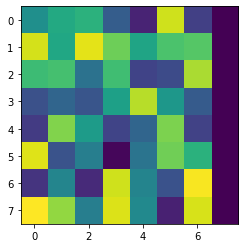

In [85]:
A = np.apply_along_axis(fft2d, 0, A)
A = np.apply_along_axis(fft2d, 1, A)
A = np.apply_along_axis(ifft2d, 1, A)
A = np.apply_along_axis(ifft2d, 0, A).real
plt.imshow(A)

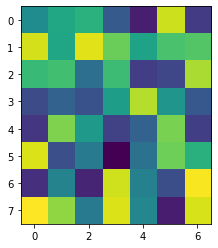

In [86]:
A = A[:S[0], :S[1]]
plt.imshow(A)

# Image Compression using FFT

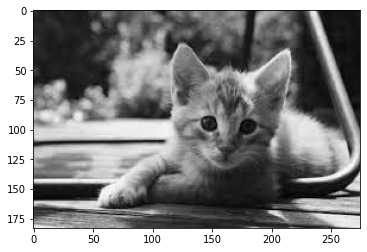

In [87]:
import cv2 as cv
img = cv.imread("download.jfif")
img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
shape = np.array(img).shape
plt.imshow(img,cmap='gray')

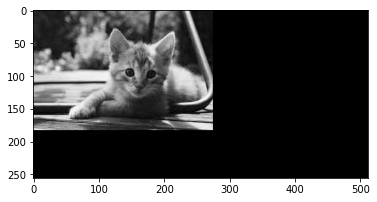

In [88]:
A = pad2d(np.array(img))
plt.imshow(A,cmap='gray')

642.6049093243848
1124.1843946876854
2166.6981209011747
13027.530109578029


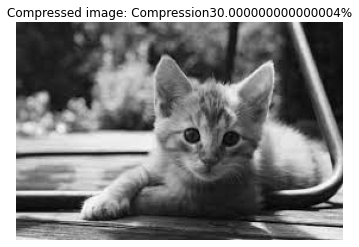

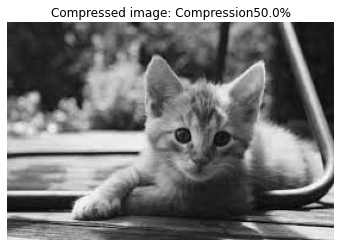

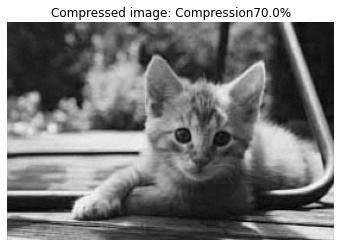

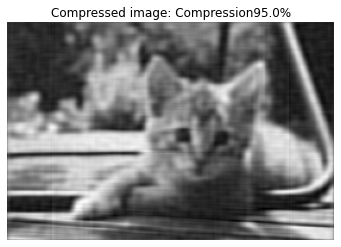

In [92]:
A1 = np.apply_along_axis(fft2d, 0, A)
A1 = np.apply_along_axis(fft2d, 1, A1)
Btsort= np.sort (np.abs (A1.reshape (-1)))
for keep in (0.7, 0.5, 0.3, 0.05 ):
    thresh=Btsort [int (np.floor((1-keep)*len(Btsort)))]
    print(thresh)
    ind=np.abs (A1)>thresh
    Atlow=A1*ind
    A2 = np.apply_along_axis(ifft2d, 1, Atlow)
    Alow = np.apply_along_axis(ifft2d, 0, A2).real[:shape[0], :shape[1]]
    mpimg.imsave(f"C:/Users/guhan/OneDrive/Desktop/AA_ASSIGNMENT-master/compression '{str((1-keep)*100)}' %.tif", Alow, format='TIFF',cmap='gray')
    plt.figure()
    plt.imshow (Alow, cmap='gray')
    plt.axis ('off') 
    plt.title('Compressed image: Compression'+ str((1-keep)*100) + '%') 
